In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

In [26]:
def plot_raw(path, index):
    file_path = path
    # Load the binary file and read as float32
    data_array = np.fromfile(file_path, dtype=np.float32)
    
    start = 500
    # Ensure data size is a multiple of 6 (each set: 4 channel readings + class + timestamp)
    trimmed_size = (data_array.size // 6) * 6
    
    trimmed_data = data_array[:trimmed_size]
    
    # Reshape into 6 columns: [Channel1, Channel2, Channel3, Channel4, Class, Timestamp]
    reshaped_data = trimmed_data.reshape(-1, 6)
    
    # Extract the EEG channels (first 4 columns)
    eeg_channels = reshaped_data[start:, :4]
    
    # Update classification labels based on the provided mapping
    class_labels = reshaped_data[start:, 4]
    class_labels = np.where(class_labels == 0, 0, class_labels)  # Nothing
    class_labels = np.where(class_labels == 1, 1, class_labels)  # Thumb open
    class_labels = np.where(class_labels == 2, 2, class_labels)  # Thumb close
    class_labels = np.where(class_labels == 3, 3, class_labels)  # Index open
    class_labels = np.where(class_labels == 4, 4, class_labels)  # Index close
    class_labels = np.where(class_labels == 5, 5, class_labels)  # Middle open
    class_labels = np.where(class_labels == 6, 6, class_labels)  # Middle close
    class_labels = np.where(class_labels == 7, 7, class_labels)  # Ring and pinky open
    class_labels = np.where(class_labels == 8, 8, class_labels)  # Ring and pinky close
    class_labels = np.where(class_labels == 9, 9, class_labels)  # Full hand open
    class_labels = np.where(class_labels == 10, 10, class_labels)  # Full hand close
    
    # Find all instances of classifications (1 to 10)
    classification_indices = np.where((class_labels >= 1) & (class_labels <= 10))[0]
    
    if len(classification_indices) > 0:
        first_classification_index = classification_indices[index]
        #first_classification_index = 1000
    else:
        raise ValueError("No classification labels (1 to 10) found in the data.")
    
    # Define the window size (500 points) and calculate the start and end indices
    window_size = 500
    half_window = window_size // 2
    start_index = max(0, first_classification_index - half_window)  # Default to first classification index
    end_index = start_index + window_size
    
    # Ensure the window does not exceed the data bounds
    if end_index > eeg_channels.shape[0]:
        end_index = eeg_channels.shape[0]
        start_index = end_index - window_size
    
    # Extract the windowed data
    windowed_eeg = eeg_channels[start_index:end_index, :]
    windowed_labels = class_labels[start_index:end_index]
    
    # Plot the windowed EEG channels with classification labels
    fig, axes = plt.subplots(windowed_eeg.shape[1], 1, figsize=(12, 8), sharex=True)
    fig.suptitle("Windowed EEG Channels with Classification Labels", fontsize=16)
    for i in range(windowed_eeg.shape[1]):
        axes[i].plot(windowed_eeg[:, i], label=f'Channel {i+1}')
        axes[i].set_title(f"Channel {i+1}")
        axes[i].set_ylabel("Amplitude")
        axes[i].legend()
        # Overlay classification labels
        for j in range(len(windowed_labels)):
            if windowed_labels[j] == 1:  # Thumb open
                axes[i].axvline(x=j, color='blue', linestyle='--', alpha=0.5, label='Thumb Open' if j == 0 else "")
                axes[i].text(j, windowed_eeg[:, i].max(), 'Thumb Open', color='blue', fontsize=8, rotation=90, va='bottom')
            elif windowed_labels[j] == 2:  # Thumb close
                axes[i].axvline(x=j, color='cyan', linestyle='--', alpha=0.5, label='Thumb Close' if j == 0 else "")
                axes[i].text(j, windowed_eeg[:, i].max(), 'Thumb Close', color='cyan', fontsize=8, rotation=90, va='bottom')
            elif windowed_labels[j] == 3:  # Index open
                axes[i].axvline(x=j, color='green', linestyle='--', alpha=0.5, label='Index Open' if j == 0 else "")
                axes[i].text(j, windowed_eeg[:, i].max(), 'Index Open', color='green', fontsize=8, rotation=90, va='bottom')
            elif windowed_labels[j] == 4:  # Index close
                axes[i].axvline(x=j, color='lime', linestyle='--', alpha=0.5, label='Index Close' if j == 0 else "")
                axes[i].text(j, windowed_eeg[:, i].max(), 'Index Close', color='lime', fontsize=8, rotation=90, va='bottom')
            elif windowed_labels[j] == 5:  # Middle open
                axes[i].axvline(x=j, color='yellow', linestyle='--', alpha=0.5, label='Middle Open' if j == 0 else "")
                axes[i].text(j, windowed_eeg[:, i].max(), 'Middle Open', color='yellow', fontsize=8, rotation=90, va='bottom')
            elif windowed_labels[j] == 6:  # Middle close
                axes[i].axvline(x=j, color='orange', linestyle='--', alpha=0.5, label='Middle Close' if j == 0 else "")
                axes[i].text(j, windowed_eeg[:, i].max(), 'Middle Close', color='orange', fontsize=8, rotation=90, va='bottom')
            elif windowed_labels[j] == 7:  # Ring and pinky open
                axes[i].axvline(x=j, color='purple', linestyle='--', alpha=0.5, label='Ring and Pinky Open' if j == 0 else "")
                axes[i].text(j, windowed_eeg[:, i].max(), 'Ring & Pinky Open', color='purple', fontsize=8, rotation=90, va='bottom')
            elif windowed_labels[j] == 8:  # Ring and pinky close
                axes[i].axvline(x=j, color='magenta', linestyle='--', alpha=0.5, label='Ring and Pinky Close' if j == 0 else "")
                axes[i].text(j, windowed_eeg[:, i].max(), 'Ring & Pinky Close', color='magenta', fontsize=8, rotation=90, va='bottom')
            elif windowed_labels[j] == 9:  # Full hand open
                axes[i].axvline(x=j, color='red', linestyle='--', alpha=0.5, label='Full Hand Open' if j == 0 else "")
                axes[i].text(j, windowed_eeg[:, i].max(), 'Full Hand Open', color='red', fontsize=8, rotation=90, va='bottom')
            elif windowed_labels[j] == 10:  # Full hand close
                axes[i].axvline(x=j, color='brown', linestyle='--', alpha=0.5, label='Full Hand Close' if j == 0 else "")
                axes[i].text(j, windowed_eeg[:, i].max(), 'Full Hand Close', color='brown', fontsize=8, rotation=90, va='bottom')
    axes[-1].set_xlabel("Samples")
    axes[0].legend(loc='upper right')  # Add legend to the first subplot
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [21]:
def plot_ica(path, index):
    file_path = path
    # Load the binary file and read as float32
    data_array = np.fromfile(file_path, dtype=np.float32)
    
    start = 500
    # Ensure data size is a multiple of 6 (each set: 4 channel readings + class + timestamp)
    trimmed_size = (data_array.size // 6) * 6
    
    trimmed_data = data_array[:trimmed_size]
    
    # Reshape into 6 columns: [Channel1, Channel2, Channel3, Channel4, Class, Timestamp]
    reshaped_data = trimmed_data.reshape(-1, 6)
    
    # Extract the EEG channels (first 4 columns)
    eeg_channels = reshaped_data[start:, :4]
    
    # Update classification labels based on the provided mapping
    class_labels = reshaped_data[start:, 4]
    class_labels = np.where(class_labels == 0, 0, class_labels)  # Nothing
    class_labels = np.where(class_labels == 1, 1, class_labels)  # Thumb open
    class_labels = np.where(class_labels == 2, 2, class_labels)  # Thumb close
    class_labels = np.where(class_labels == 3, 3, class_labels)  # Index open
    class_labels = np.where(class_labels == 4, 4, class_labels)  # Index close
    class_labels = np.where(class_labels == 5, 5, class_labels)  # Middle open
    class_labels = np.where(class_labels == 6, 6, class_labels)  # Middle close
    class_labels = np.where(class_labels == 7, 7, class_labels)  # Ring and pinky open
    class_labels = np.where(class_labels == 8, 8, class_labels)  # Ring and pinky close
    class_labels = np.where(class_labels == 9, 9, class_labels)  # Full hand open
    class_labels = np.where(class_labels == 10, 10, class_labels)  # Full hand close
    
    # Find all instances of classifications (1 to 10)
    classification_indices = np.where((class_labels >= 1) & (class_labels <= 10))[0]
    
    if len(classification_indices) > 0:
        first_classification_index = classification_indices[index]
        #first_classification_index = 1000
    else:
        raise ValueError("No classification labels (1 to 10) found in the data.")
    
    # Define the window size (500 points) and calculate the start and end indices
    window_size = 500
    half_window = window_size // 2
    start_index = max(0, first_classification_index - half_window)  # Default to first classification index
    end_index = start_index + window_size
    
    # Ensure the window does not exceed the data bounds
    if end_index > eeg_channels.shape[0]:
        end_index = eeg_channels.shape[0]
        start_index = end_index - window_size
    
    # Extract the windowed data
    windowed_eeg = eeg_channels[start_index:end_index, :]
    windowed_labels = class_labels[start_index:end_index]
    
    # Plot the windowed EEG channels with classification labels
    # Apply FastICA to the windowed EEG data
    ica = FastICA(n_components=windowed_eeg.shape[1], random_state=42)
    ica_sources = ica.fit_transform(windowed_eeg)  # Independent components
    
    #ica_sources[:, 0] = 0  # Zero out the first component
    #ica_sources[:, 1] = 0  # Zero out the second component
    
    # Reconstruct the signal using the modified ICA sources
    reconstructed_signal = ica.inverse_transform(ica_sources)
    
    # Plot the ICA components
    fig, axes = plt.subplots(ica_sources.shape[1], 1, figsize=(12, 8), sharex=True)
    fig.suptitle("ICA Components of Windowed EEG Data", fontsize=16)
    for i in range(ica_sources.shape[1]):
        axes[i].plot(ica_sources[:, i], label=f'ICA Component {i+1}')
        axes[i].set_title(f"ICA Component {i+1}")
        axes[i].set_ylabel("Amplitude")
        axes[i].legend()
        # Overlay classification labels
        for j in range(len(windowed_labels)):
            if windowed_labels[j] == 1:  # Thumb open
                axes[i].axvline(x=j, color='blue', linestyle='--', alpha=0.5, label='Thumb Open' if j == 0 else "")
            elif windowed_labels[j] == 2:  # Thumb close
                axes[i].axvline(x=j, color='cyan', linestyle='--', alpha=0.5, label='Thumb Close' if j == 0 else "")
            elif windowed_labels[j] == 3:  # Index open
                axes[i].axvline(x=j, color='green', linestyle='--', alpha=0.5, label='Index Open' if j == 0 else "")
            elif windowed_labels[j] == 4:  # Index close
                axes[i].axvline(x=j, color='lime', linestyle='--', alpha=0.5, label='Index Close' if j == 0 else "")
            elif windowed_labels[j] == 5:  # Middle open
                axes[i].axvline(x=j, color='yellow', linestyle='--', alpha=0.5, label='Middle Open' if j == 0 else "")
            elif windowed_labels[j] == 6:  # Middle close
                axes[i].axvline(x=j, color='orange', linestyle='--', alpha=0.5, label='Middle Close' if j == 0 else "")
            elif windowed_labels[j] == 7:  # Ring and pinky open
                axes[i].axvline(x=j, color='purple', linestyle='--', alpha=0.5, label='Ring and Pinky Open' if j == 0 else "")
            elif windowed_labels[j] == 8:  # Ring and pinky close
                axes[i].axvline(x=j, color='magenta', linestyle='--', alpha=0.5, label='Ring and Pinky Close' if j == 0 else "")
            elif windowed_labels[j] == 9:  # Full hand open
                axes[i].axvline(x=j, color='red', linestyle='--', alpha=0.5, label='Full Hand Open' if j == 0 else "")
            elif windowed_labels[j] == 10:  # Full hand close
                axes[i].axvline(x=j, color='brown', linestyle='--', alpha=0.5, label='Full Hand Close' if j == 0 else "")
    axes[-1].set_xlabel("Samples")
    axes[0].legend(loc='upper right')  # Add legend to the first subplot
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

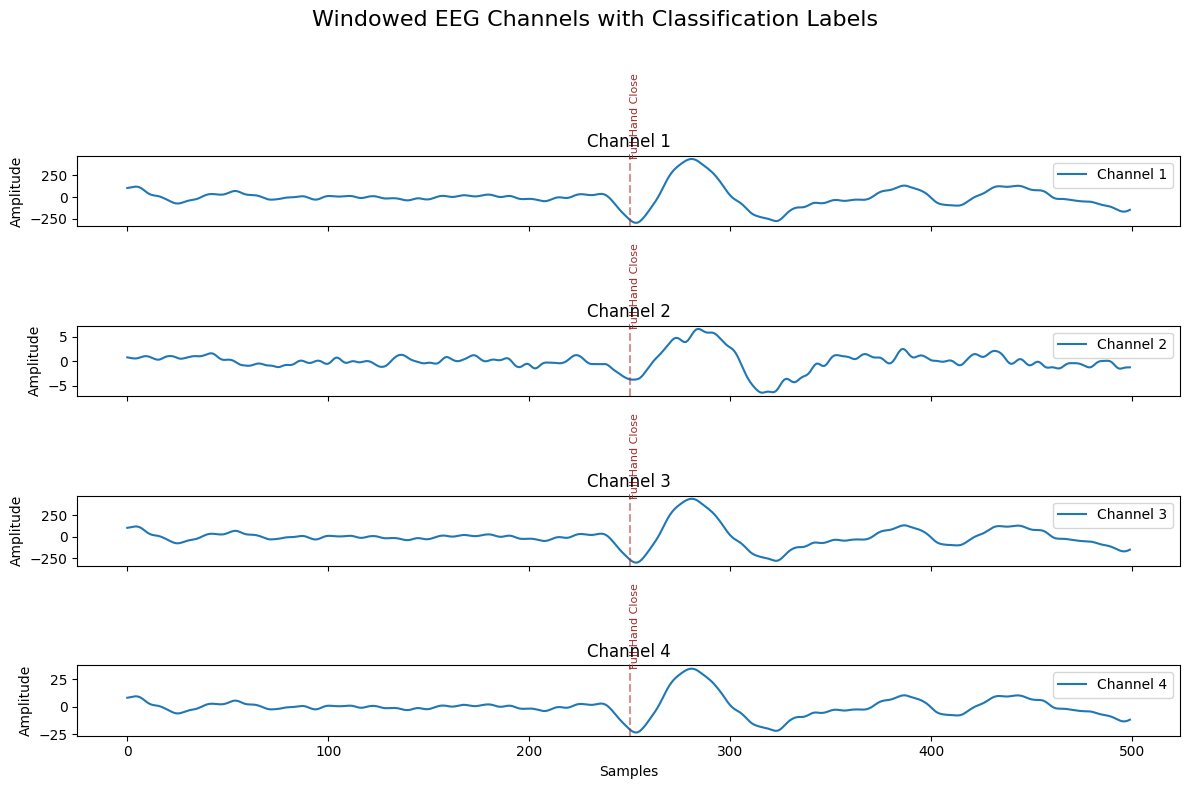

In [27]:
plot_raw("EEG_Recordings/Daniel/1minOpenClose_BP2/trial3.bin",15)

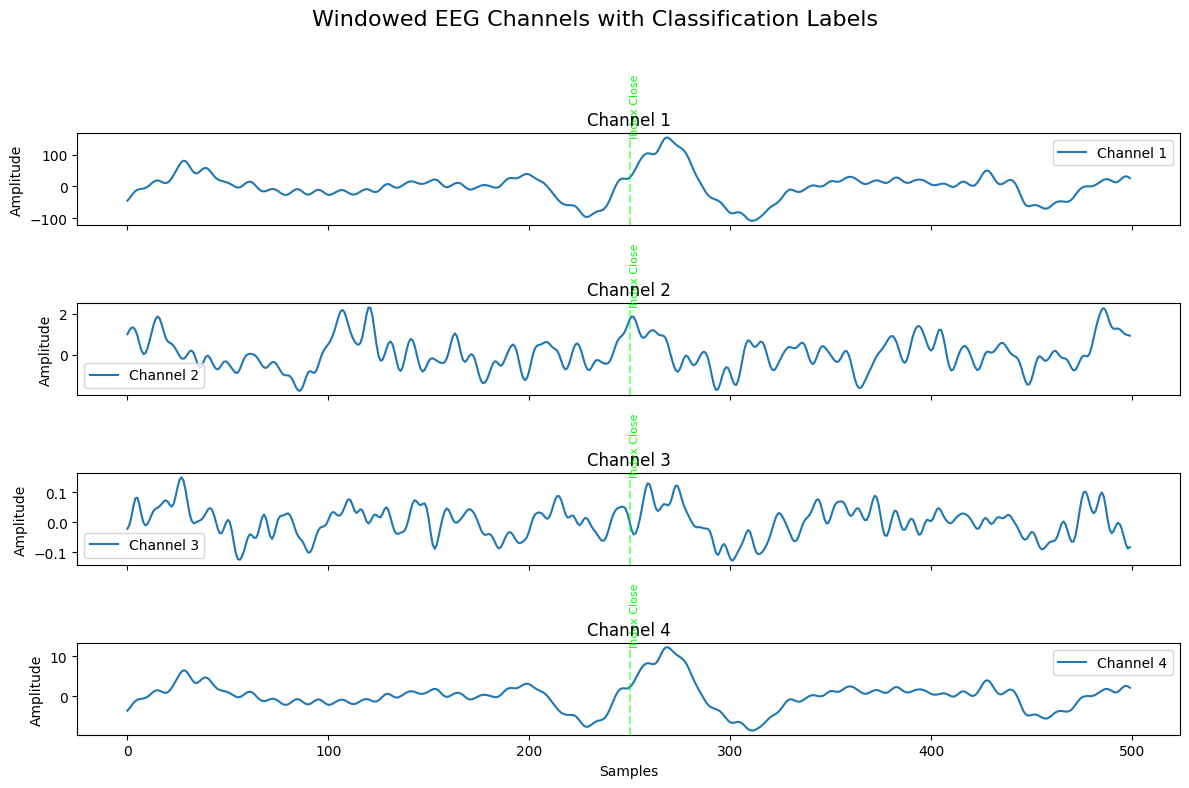

In [16]:
plot("EEG_Recordings/Daniel/3minIndexOpenClose_BP2/trial1.bin")

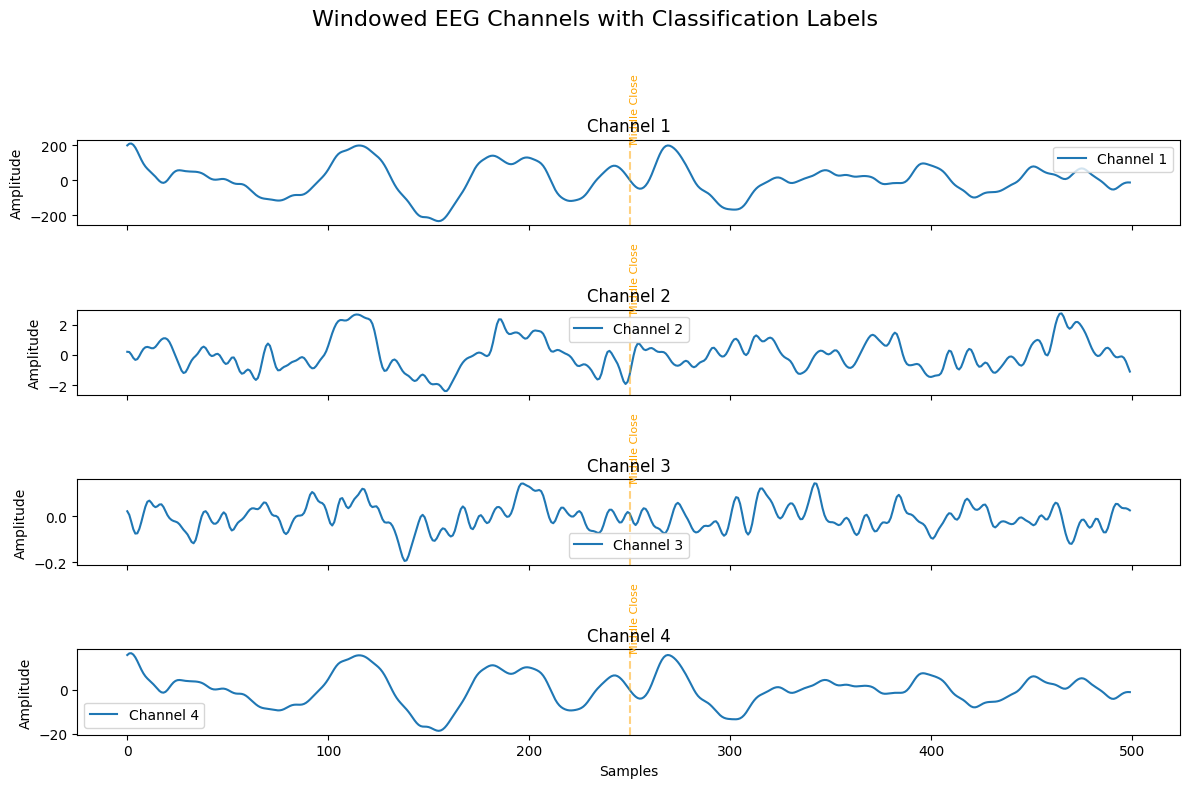

In [17]:
plot("EEG_Recordings/Daniel/3minMiddleOpenClose_BP2/trial1.bin")

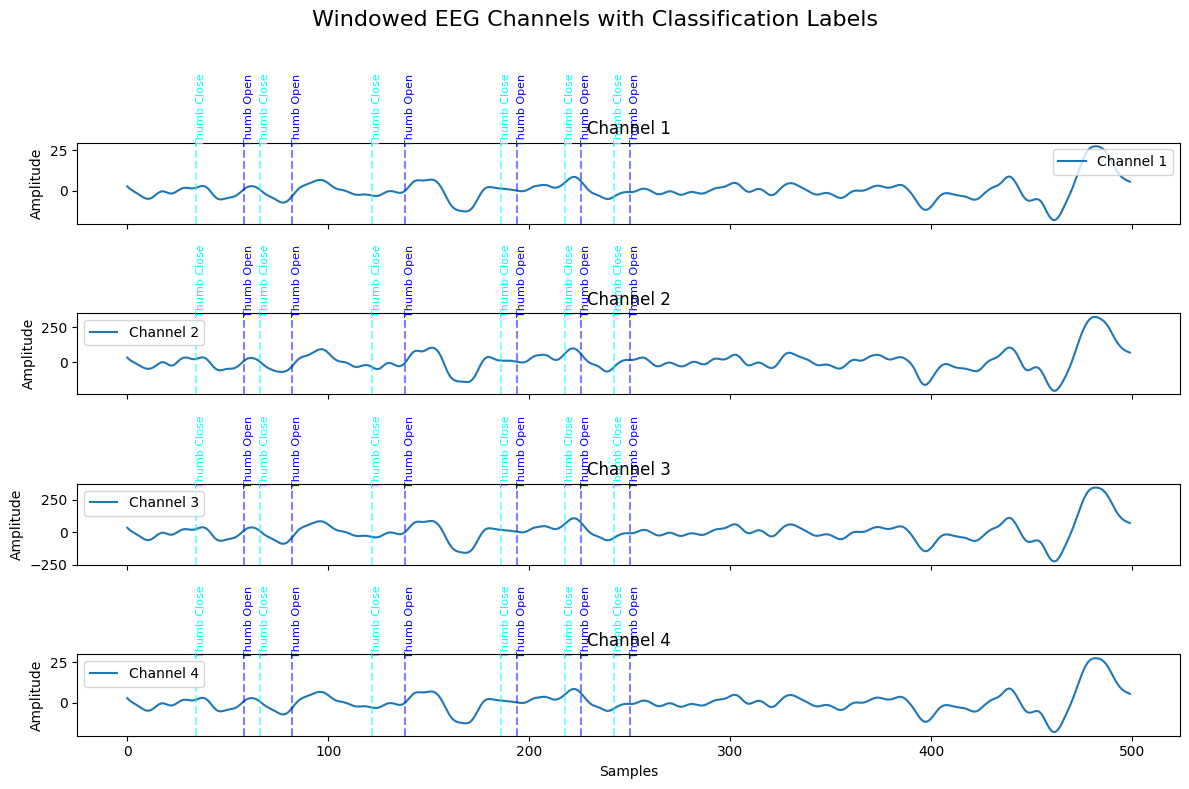

In [18]:
plot("EEG_Recordings/Daniel/3minThumbOpenClose_BP2/trial1.bin")

In [19]:
plot("EEG_Recordings/Daniel/3minRingPinkyOpenClose_BP2/trial1.bin")

FileNotFoundError: [Errno 2] No such file or directory: 'EEG_Recordings/Daniel/3minRingPinkyOpenClose_BP2/trial1.bin'